# Drug Consumption Dataset Analysis
This is an analysis of 1885 respondents, containing personality-test information and their frequency of use for ~20 different drugs.
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

I must admit, I did not think for long enough about how to use mixture models to extract useful data from this. I just jumped into analysis without a whole lot of thought, and I ended up with less insight than I'd have liked. 

Anyway, I was able to make a sample generator for each drug in this dataset, producing a random "X-user" where X is any drug in this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
column_headers = [
    'id',
    'age',
    'gender',
    'education',
    'country',
    'ethnicity',
    'neuroticism',
    'extraversion',
    'openness',
    'agreeableness',
    'conscientiousness',
    'impulsiveness',
    'sensation_seeking',
    'alcohol',
    'amphet',
    'amyl',
    'benzos',
    'caffeine',
    'cannabis',
    'chocolate',
    'cocaine',
    'crack',
    'mdma',
    'heroin',
    'ketamine',
    'legalh',
    'lsd',
    'meth',
    'mushrooms',
    'nicotine',
    'semeron', # fictious drug
    'vsa'      # volatile substance abuse
]

raw_data = pd.read_csv('drug_consumption.data', names=column_headers)
print(raw_data.head())

   id      age   gender  education  country  ethnicity  neuroticism  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   

   extraversion  openness  agreeableness  ...  mdma  heroin  ketamine legalh  \
0      -0.57545  -0.58331       -0.91699  ...   CL0     CL0       CL0    CL0   
1       1.93886   1.43533        0.76096  ...   CL4     CL0       CL2    CL0   
2       0.80523  -0.84732       -1.62090  ...   CL0     CL0       CL0    CL0   
3      -0.80615  -0.01928        0.59042  ...   CL0     CL0       CL2    CL0   
4      -1.63340  -0.45174       -0.30172  ...   CL1     CL0       CL0    CL1   

   lsd meth mushrooms nicotine semeron  vsa  
0  CL0  CL0       CL0      CL2     CL0  CL0  


In [3]:
# the raw data is filled with incomprehensible values
# I created a mapping for the columns that are hard to understand
age_mapping = {
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+',
}
gender_mapping = {
    0.48246: 'female',
    -0.48246: 'male',
}
education_mapping = {
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years 30',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university, no degree',
    -0.05921: 'Professional certificate/ diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree',
}
country_mapping = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA',
}
ethnicity_mapping = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White',
}
neuroticism_mapping = {
    -3.46436: 12, -0.67825: 29, 1.02119: 46,
    -3.15735: 13, -0.58016: 30, 1.13281: 47,
    -2.75696: 14, -0.46725: 31, 1.23461: 48,
    -2.52197: 15, -0.34799: 32, 1.37297: 49,
    -2.42317: 16, -0.24649: 33, 1.49158: 50,
    -2.34360: 17, -0.14882: 34, 1.60383: 51,
    -2.21844: 18, -0.05188: 35, 1.72012: 52,
    -2.05048: 19, 0.04257: 36, 1.83990: 53,
    -1.86962: 20, 0.13606: 37, 1.98437: 54,
    -1.69163: 21, 0.22393: 38, 2.12700: 55,
    -1.55078: 22, 0.31287: 39, 2.28554: 56,
    -1.43907: 23, 0.41667: 40, 2.46262: 57,
    -1.32828: 24, 0.52135: 41, 2.61139: 58,
    -1.19430: 25, 0.62967: 42, 2.82196: 59,
    -1.05308: 26, 0.73545: 43, 3.27393: 60,
    -0.92104: 27, 0.82562: 44,
    -0.79151: 28, 0.91093: 45,
}
extraversion_mapping = {
    -3.27393: 16, -1.23177: 31, 0.80523: 45,
    -3.00537: 18,   -1.09207: 32, 0.96248: 46,
    -2.72827: 19,   -0.94779: 33, 1.11406: 47,
    -2.53830: 20,   -0.80615: 34, 1.28610: 48,
    -2.44904: 21,   -0.69509: 35, 1.45421: 49,
    -2.32338: 22,   -0.57545: 36, 1.58487: 50,
    -2.21069: 23,   -0.43999: 37, 1.74091: 51,
    -2.11437: 24,   -0.30033: 38, 1.93886: 52,
    -2.03972: 25,   -0.15487: 39, 2.12700: 53,
    -1.92173: 26,   0.00332: 40, 2.32338: 54,
    -1.76250: 27,   0.16767: 41, 2.57309: 55,
    -1.63340: 28,  0.32197: 42, 2.85950: 56,
    -1.50796: 29,   0.47617: 43, 3.00537: 58,
    -1.37639: 30,   0.63779: 44, 3.27393: 59
}
openness_mapping = {
    -3.27393: 24, -1.11902: 38, 0.58331: 50,
    -2.85950: 26, -0.97631: 39, 0.72330: 51,
    -2.63199: 28,-0.84732: 40,0.88309: 52,
    -2.39883: 29,-0.71727: 41,1.06238: 53,
    -2.21069: 30,-0.58331: 42,1.24033: 54,
    -2.09015: 31,-0.45174: 43,1.43533: 55,
    -1.97495: 32,-0.31776: 44,1.65653: 56,
    -1.82919: 33,-0.17779: 45,1.88511: 57,
    -1.68062: 34,-0.01928: 46,2.15324: 58,
    -1.55521: 35,0.14143: 47,2.44904: 59,
    -1.42424: 36, 0.29338: 48, 2.90161: 60, 
    -1.27553: 37, 0.44585: 49,
}
agreeableness_mapping = {
    -3.46436: 12,-1.34289: 34, 0.76096: 48,
    -3.15735: 16,-1.21213: 35,0.94156: 49,
    -3.00537: 18, -1.07533: 36,  1.11406: 50,
    -2.90161: 23,  -0.91699: 37,  1.2861: 51,
    -2.78793: 24,  -0.76096: 38, 1.45039: 52,
    -2.70172: 25, -0.60633: 39, 1.61108: 53,
    -2.53830: 26, -0.45321: 40,1.81866: 54,
    -2.35413: 27, -0.30172: 41, 2.03972: 55,
    -2.21844: 28, -0.15487: 42, 2.23427: 56,
    -2.07848: 29, -0.01729: 43, 2.46262: 57,
    -1.92595: 30, 0.13136: 44, 2.75696: 58,
    -1.77200: 31, 0.28783: 45, 3.15735: 59,
    -1.62090: 32, 0.43852: 46, 3.46436: 60,
    -1.47955: 33, 0.59042: 47,
}
conscientiousness_mapping = {
    -3.46436: 17,-1.25773: 32,0.58489: 46,
    -3.15735: 19,-1.13788: 33,0.7583: 47,
    -2.90161: 20,-1.01450: 34,0.93949: 48,
    -2.72827: 21,-0.89891: 35,1.13407: 49,
    -2.57309: 22,-0.78155: 36,1.30612: 50,
    -2.42317: 23,-0.65253: 37,1.46191: 51,
    -2.30408: 24,-0.52745: 38,1.63088: 52,
    -2.18109: 25,-0.40581: 39,1.81175: 53,
    -2.04506: 26,-0.27607: 40,2.04506: 54,
    -1.92173: 27,-0.14277: 41,2.33337: 55,
    -1.78169: 28,-0.00665: 42,2.63199: 56,
    -1.64101: 29,0.12331: 43,3.00537: 57,
    -1.51840: 30,0.25953: 44,3.46436: 59,
    -1.38502: 31,0.41594: 45,
}
drug_use_mapping = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
}

drugs = ['alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 'cannabis', 'chocolate',
       'cocaine', 'crack', 'mdma', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'semeron', 'vsa']

labeled_data = raw_data.copy(deep=True)
for d in drugs:
    labeled_data[d] = raw_data[d].apply(lambda x: drug_use_mapping[x])
labeled_data['age'] = raw_data['age'].apply(lambda x: age_mapping[x])
labeled_data['gender'] = raw_data['gender'].apply(lambda x: gender_mapping[x])
labeled_data['education'] = raw_data['education'].apply(lambda x: education_mapping[x])
labeled_data['country'] = raw_data['country'].apply(lambda x: country_mapping[x])
labeled_data['ethnicity'] = raw_data['ethnicity'].apply(lambda x: ethnicity_mapping[x])

print(labeled_data.head())

   id    age  gender                          education country  \
0   1  35-44  female  Professional certificate/ diploma      UK   
1   2  25-34    male                   Doctorate degree      UK   
2   3  35-44    male  Professional certificate/ diploma      UK   
3   4  18-24  female                     Masters degree      UK   
4   5  35-44  female                   Doctorate degree      UK   

           ethnicity  neuroticism  extraversion  openness  agreeableness  ...  \
0  Mixed-White/Asian      0.31287      -0.57545  -0.58331       -0.91699  ...   
1              White     -0.67825       1.93886   1.43533        0.76096  ...   
2              White     -0.46725       0.80523  -0.84732       -1.62090  ...   
3              White     -0.14882      -0.80615  -0.01928        0.59042  ...   
4              White      0.73545      -1.63340  -0.45174       -0.30172  ...   

                     mdma      heroin             ketamine  \
0              Never Used  Never Used           

In [8]:
# let's get the counts of each of the values in each column
demographics = ['age', 'gender', 'education', 'country', 'ethnicity']
big_5 = ['neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness']
personalities = big_5 + ['impulsiveness', 'sensation_seeking']

demographic_counts = {}
for d in demographics:
    demographic_counts[d] = labeled_data[d].value_counts()

# I want to keep labeled data as a float variable representing the std dev. of the personality,
# so we'll copy this just for the bar charts
personality_data = labeled_data[[x for x in big_5]].copy(deep=True)
personality_data['neuroticism'] = raw_data['neuroticism'].apply(lambda x: neuroticism_mapping[x])
personality_data['extraversion'] = raw_data['extraversion'].apply(lambda x: extraversion_mapping[x])
personality_data['openness'] = raw_data['openness'].apply(lambda x: openness_mapping[x])
personality_data['agreeableness'] = raw_data['agreeableness'].apply(lambda x: agreeableness_mapping[x])
personality_data['conscientiousness'] = raw_data['conscientiousness'].apply(lambda x: conscientiousness_mapping[x])
personality_data['sensation_seeking'] = raw_data['impulsiveness']
personality_data['impulsiveness'] = raw_data['impulsiveness']

personality_counts = {}
for p in personalities:
    personality_counts[p] = personality_data[p].value_counts()

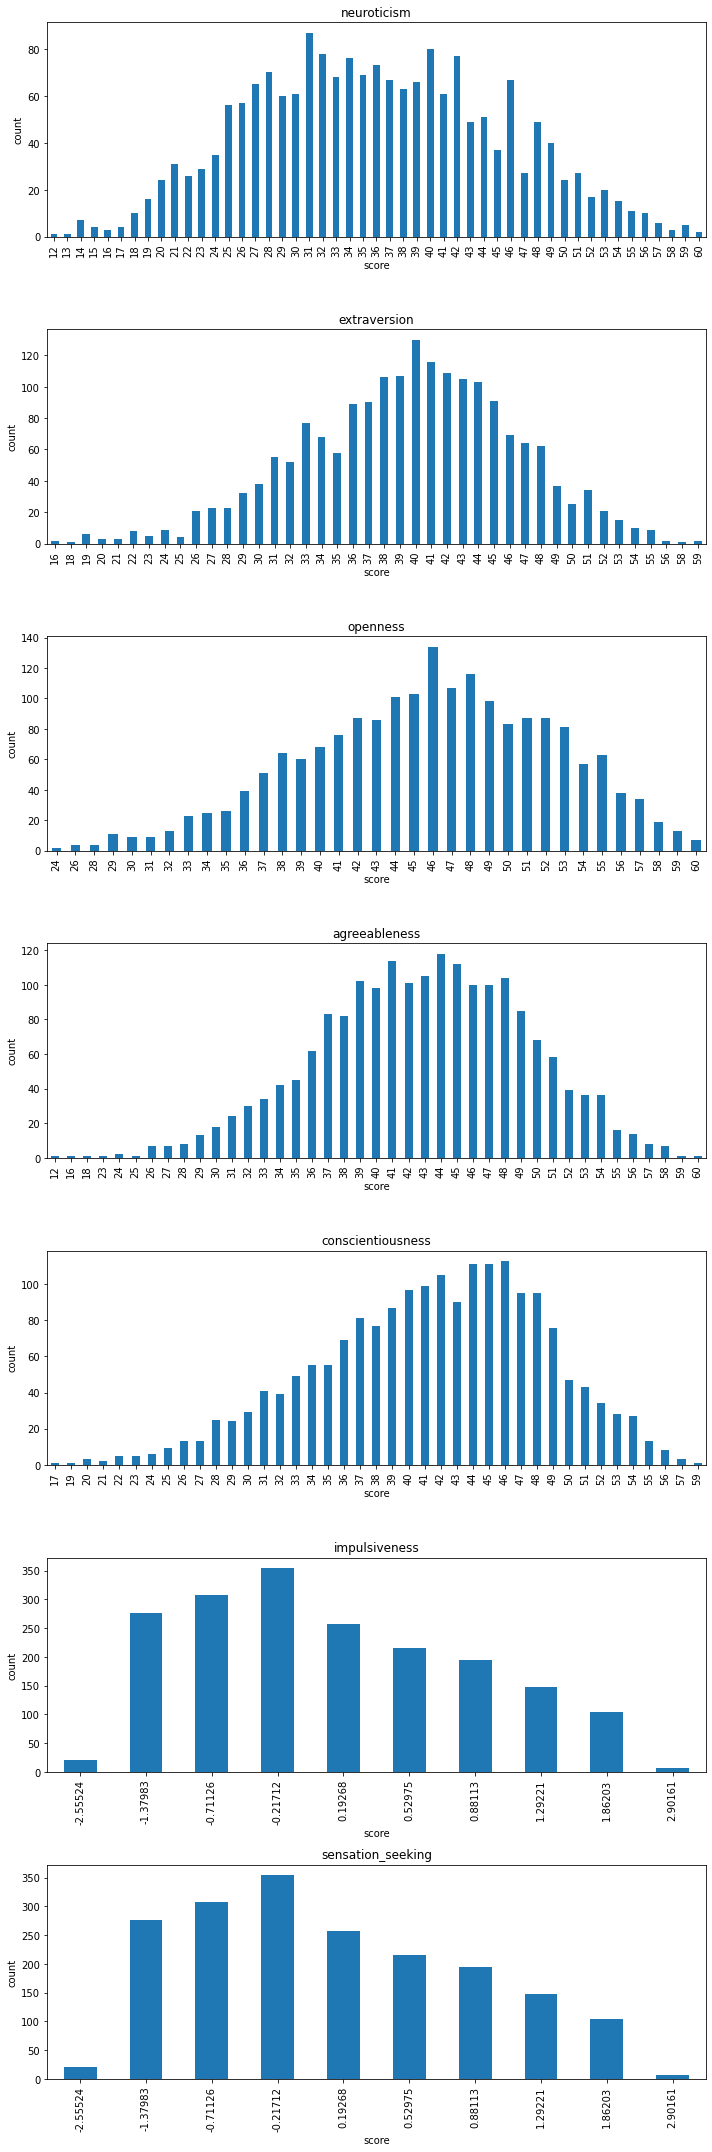

In [11]:
# let's do a sanity check on the big-5 personality traits
# these are supposed to look like gaussian distributions

fig, axs = plt.subplots(7, 1, figsize=(10,30))
for i, p in enumerate(personalities):
    personality_counts[p].sort_index().plot(
        kind='bar',
        ax=axs[i],
        title=p,
        xlabel='score',
        ylabel='count',
    )
fig.tight_layout()

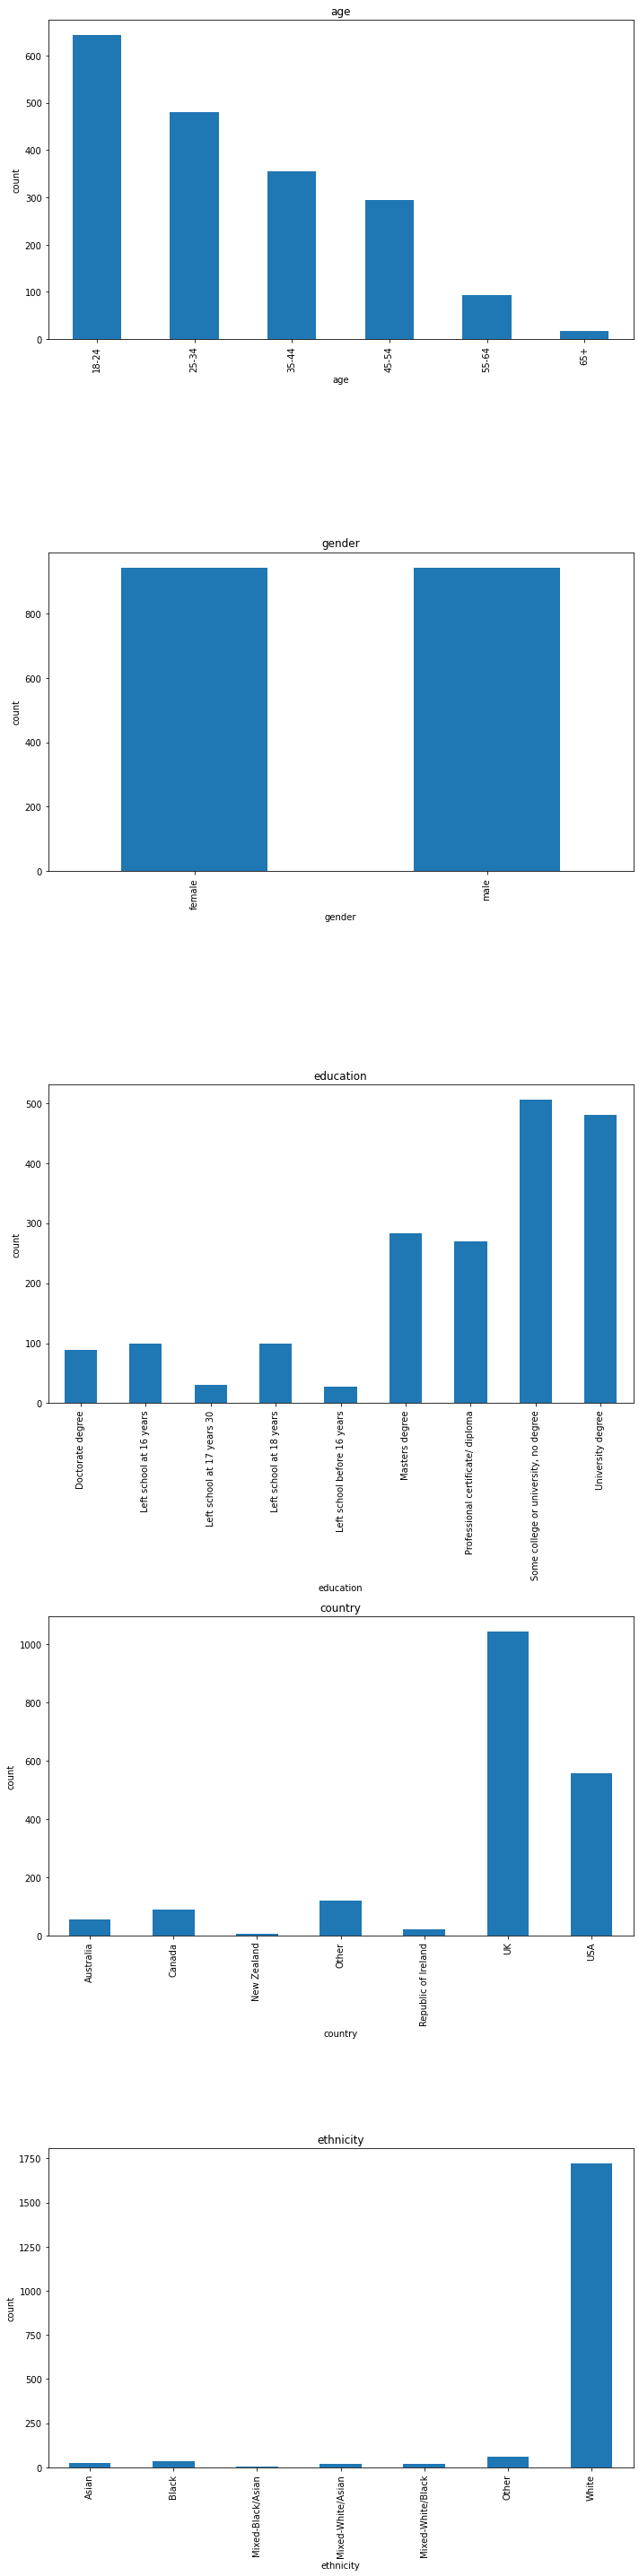

In [12]:
# *likely* Gaussian distributions, as expected

# let's just take a look at the demographic data so we're familiar with the dataset
demo_fig, demo_axs = plt.subplots(5, 1, figsize=(10, 40))
for i, d in enumerate(demographics):
    demographic_counts[d].sort_index().plot(
        kind='bar',
        ax=demo_axs[i],
        title=d,
        xlabel=d,
        ylabel='count',
    )
demo_fig.tight_layout()

### Demographics notes
There are some things to note looking at the demographics counts. 
1. **Age**: We skew young. This study luckily divided age groups into 18-24 and 25-34, which I view as a reasonable grouping of younger age groups - 18-24y are generally still developing and have a volatile lifestyle, whereas that generally starts to recede around age 25. 
2. **Gender** counts look normal.
3. **Education** skews towards *more* education. Just something to keep in mind. The largest group is "some college/university, no degree", probably implying many of the respondents are college students.
4. **Country**:We're sampling mostly from the US and the UK. Just something to keep in mind.
5. **Ethnicity**: Mostly white respondents. Very low counts on non-white respondents, and because of this I think I will stay away from any ethnicity analysis. 


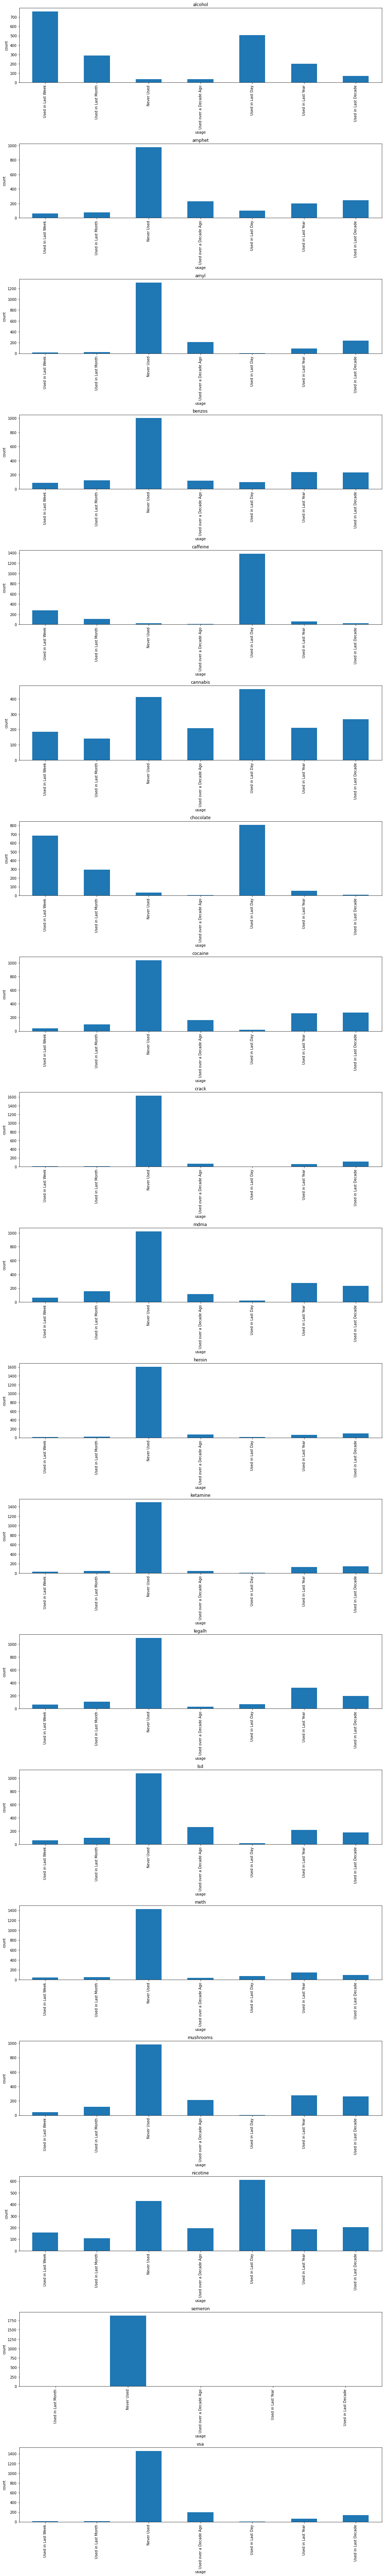

In [13]:
# let's look at the drug use of this population as well

drug_counts = {}
for d in drugs:
    drug_counts[d] = labeled_data[d].value_counts(sort=False)
    
use_fig, use_axs = plt.subplots(len(drugs), 1, figsize=(15, 100))
for i, d in enumerate(drugs):
    drug_counts[d].plot(
        kind='bar',
        ax=use_axs[i],
        title=d,
        xlabel='usage',
        ylabel='count',
    )
use_fig.tight_layout()

In [14]:
# Essentially what I want to do is find, GIVEN someone is a particular-drug-user, what is the distribution of
# the Big 5 Personality traits?

# If we do a mixture model for each of the drugs, we would be able to feed a brand new person's data into
# each of the models to assess use-risk for each drug. 

# First, we'll distinguish between "user" and "non-user" by grouping "Never-used" and "used over a decade ago"
# into the non-user category, and the rest in the user category.

for drug in drugs:
    labeled_data[drug].loc[labeled_data[drug] == 'Never Used'] = 'non-user'
    labeled_data[drug].loc[labeled_data[drug] == 'Used over a Decade Ago'] = 'non-user'
    labeled_data[drug].loc[labeled_data[drug] != 'non-user'] = 'user'

/home/kam/dev/uciml_data_analysis/learning/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
# We'll need conditional distributions; essentially, what is the mean and variance of the Big 5 scores
# given the person is a X-user?

# now that we have distributions for each drug, we need to carry out expectation maximization

def initialize_params (num_gaussians, num_vars, cov_scale=1):
    # initialize weights randomly
    gauss_weights = np.random.random(num_gaussians)
    gauss_weights /= gauss_weights.sum() # need to add up to 1
    
    # initialize gaussian means randomly between -3 and 3
    gauss_means = np.random.uniform(-3, 3, (num_gaussians, num_vars))
    
    # initialize covariance matrices randomly
    # basically: different covariance matrices for each gaussian, initilized as identity matrices
    cov_matrices = np.array([np.eye(num_vars)] * num_gaussians) * cov_scale

    return [gauss_weights, gauss_means, cov_matrices]

In [17]:
# to use a gaussian distribution for our personality traits
from scipy.stats import multivariate_normal

def gaussian_mixture_model (X, num_gaussians):
    '''
    X ~ 
        cols: personalities distributions - we'll use a 1-var gaussian for each one
        rows: entries (N)
    '''
    
    N, num_vars = X.shape
    
    # initialize parameters
    gauss_weights, gauss_means, cov_matrices = initialize_params(num_gaussians, num_vars, X.std())
    
    loglikelihood = 0
    
    max_iterations = 100
    
    for i in range(max_iterations):
        
        # EXPECTATION
        
        E = np.zeros((num_gaussians, N))
        
        for g in range(num_gaussians):
            for s in range(N):
                # try to fit the current data to a distribution
                # to do this we need to get the PDF of our current mean/cov guesses and see P(X)
                E[g, s] = gauss_weights[g] * multivariate_normal(gauss_means[g], cov_matrices[g]).pdf(X[s])
        
        E /= E.sum(0)
        
        # MAXIMIZATION
        
        # update weights, means of each gaussian
        gauss_weights = np.zeros(num_gaussians)
        gauss_means = np.zeros((num_gaussians, num_vars))
        
        for g in range(num_gaussians):
            for s in range(N):
                gauss_weights[g] += E[g, s]
                gauss_means[g] += E[g, s] * X[s]
            gauss_means[g] /= E[g, :].sum()
        
        gauss_weights /= N
        
        # update cov_matrices of each gaussian
        cov_matrices = np.zeros((num_gaussians, num_vars, num_vars))
        for g in range(num_gaussians):
            for s in range(N):
                r = np.reshape(X[s] - gauss_means[g], (num_vars, 1))
                cov_matrices[g] += E[g, s] * np.dot(r, r.T)
            cov_matrices[g] /= E[g, :].sum()
        
        # update log likelihood
        loglikelihood_new = 0.0
        for s in range(N):
            l = 0
            for g in range(num_gaussians):
                l += gauss_weights[g] * multivariate_normal(gauss_means[g], cov_matrices[g]).pdf(X[s])
            loglikelihood_new += np.log(l)
            
        # break condition (basically if we're hardly making progress anymore)
        if abs(loglikelihood - loglikelihood_new) < 0.01:
            break
        
        if i % 10 == 0:
            print('iteration ', i)
            print('log(likelihood): ', loglikelihood)

        loglikelihood = loglikelihood_new
    
    return [gauss_weights.round(3), gauss_means.round(3), cov_matrices.round(3)]
         

In [18]:
# the data we're going to feed this, since we want to predict 
# user or non-user, is the distributions of the personality metrics
# GIVEN they're a X-user
data = np.array(labeled_data[personalities].loc[labeled_data['mdma'] == 'user'])

In [19]:
weights, means, cov_matrices = gaussian_mixture_model(data, 2)

iteration  0
log(likelihood):  0
iteration  10
log(likelihood):  -6696.346737060197
iteration  20
log(likelihood):  -6691.970323906355
iteration  30
log(likelihood):  -6691.086780259191
iteration  40
log(likelihood):  -6690.880901581909


[-0.17646669  1.24685777  0.6281838  -0.70937351  0.28759723  0.80661848
  0.71314513]


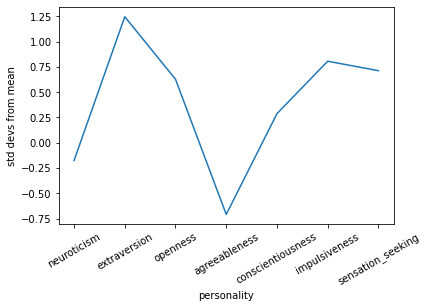

In [20]:
# numpy makes it easy to generate samples from our new mixture model
n = 100
samples = np.concatenate([np.random.multivariate_normal(means, cov, int(weights*n)) for weights, means, cov in zip(weights, means, cov_matrices)])
plt.plot(personalities, samples[0])
plt.xticks(rotation=30)
plt.xlabel('personality')
plt.ylabel('std devs from mean')
print(samples[0])

In [21]:
# now we want to be able to do this for any drug

def get_mm(drug, num_gaussians=3):
    if drug not in labeled_data.columns:
        return -1
    data = np.array(labeled_data[personalities].loc[labeled_data[drug] == 'user'])
    weights, means, covs = gaussian_mixture_model(data, num_gaussians)
    return weights, means, covs

def generate_n_samples(weights, means, covs, n=100):
    samples = np.concatenate([np.random.multivariate_normal(means, covs, int(weights*n)) for weights, means, covs in zip(weights, means, covs)])
    return samples

def plot_sample(sample, title=''):
    plt.plot(personalities, sample)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.xlabel('personality')
    plt.ylabel('std devs from mean')

In [22]:
# now it's straightforward to generate samples of any given drug-user
weights_mushrooms, means_mushrooms, covs_mushrooms = get_mm('mushrooms')

iteration  0
log(likelihood):  0
iteration  10
log(likelihood):  -6106.951197748806
iteration  20
log(likelihood):  -6093.503682074004
iteration  30
log(likelihood):  -6089.038198397486
iteration  40
log(likelihood):  -6084.19572003745
iteration  50
log(likelihood):  -6078.910345727139
iteration  60
log(likelihood):  -6067.921532422232
iteration  70
log(likelihood):  -6066.483092052925
iteration  80
log(likelihood):  -6066.075149439097


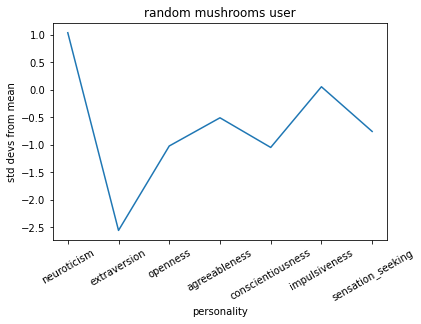

In [23]:
# generating samples for mushroom users
samples = generate_n_samples(weights_mushrooms, means_mushrooms, covs_mushrooms)
plot_sample(samples[0], title='random mushrooms user')

iteration  0
log(likelihood):  0
iteration  10
log(likelihood):  -4889.382690503845
iteration  20
log(likelihood):  -4881.334601268342
iteration  30
log(likelihood):  -4878.948434288414
iteration  40
log(likelihood):  -4877.488330171295
iteration  50
log(likelihood):  -4874.725615818873
iteration  60
log(likelihood):  -4874.274654371854
iteration  70
log(likelihood):  -4873.875955580217
iteration  80
log(likelihood):  -4873.525712400604
iteration  90
log(likelihood):  -4873.3081974040715


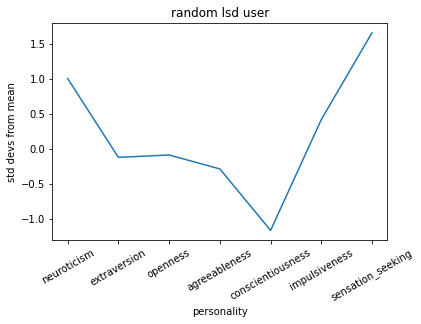

In [26]:
# generating samples for lsd users
weights_lsd, means_lsd, covs_lsd = get_mm('lsd')
samples = generate_n_samples(weights_lsd, means_lsd, covs_lsd)
plot_sample(samples[0], title='random lsd user')

In [25]:
# as a sanity-check, we can see the means of this lsd-sample distribution
# is very similar to the lsd-users we observe in our original dataset
print(pd.DataFrame(samples, columns=personalities).describe())
print(labeled_data.loc[labeled_data['lsd'] == 'user'].describe())

       neuroticism  extraversion   openness  agreeableness  conscientiousness  \
count    99.000000     99.000000  99.000000      99.000000          99.000000   
mean      0.040858      0.080774   0.484837      -0.077209          -0.272492   
std       0.962942      1.248077   0.941390       0.919360           0.912798   
min      -1.780278     -2.705806  -1.273871      -2.523070          -2.704848   
25%      -0.666062     -0.748259  -0.207078      -0.684699          -0.817299   
50%       0.103941      0.143024   0.482968      -0.018193          -0.253045   
75%       0.624431      0.992051   1.161784       0.593501           0.324206   
max       3.345284      3.438004   2.475853       2.165039           1.986264   

       impulsiveness  sensation_seeking  
count      99.000000          99.000000  
mean        0.303687           0.421750  
std         0.829500           0.868468  
min        -2.308385          -1.862919  
25%        -0.151105          -0.131457  
50%         0.3102